# <font color=green>OSA case study</font>
## <font color=dark>Feature Selection: 3.- Embedded Method <font>
    
    Embedded methods are iterative in a sense that takes care of each iteration of the model training process and carefully extract those features which contribute the most to the training for a particular iteration!


### See some references on Feature Selection such as:

https://machinelearningmastery.com/feature-selection-machine-learning-python/

https://scikit-learn.org/stable/modules/feature_selection.html

https://www.kaggle.com/jepsds/feature-selection-using-selectkbest

<font size= 5 color=magenta>----------------------------------------------------------------</font>
<font size= 5 color=magenta>----------------------------------------------------------------</font>

## Read the aggregated (clinical variables + speecg featores) Excel file for exteme male cases

In [1]:
# Import pandas
import pandas as pd

# Read Excell with extreme male cases
file = 'OSA_Aggregated_UPM.xlsx'

# Load spreadsheet
xl = pd.ExcelFile(file)

# Print the sheet names
print(xl.sheet_names)


['Sheet1']


In [2]:

# Load a sheet into a DataFrame by name: df_OSA_extreme
df_OSA_inner = xl.parse('Sheet1')

In [3]:
df_OSA_inner.head(2)

,Patient,Gender,IAH,Weight,Height,Age,Cervical,OSA,BMI,A_Form1,...,O_Ancho3,O_Ancho4,U_Form1,U_Form2,U_Form3,U_Form4,U_Ancho1,U_Ancho2,U_Ancho3,U_Ancho4
0,P0005,hombre,9.0,80,173,32,40,Healthy,26.729927,746.822118,...,164.953071,223.771504,328.075500,757.032914,2565.730496,3024.500134,74.718076,88.331369,128.496457,379.432142
1,P0006,hombre,2.0,109,190,32,42,Healthy,30.193906,741.095216,...,74.584464,216.244108,337.409601,735.000000,2532.000000,4132.186568,68.657539,192.000000,134.000000,264.337720


In [4]:
# Prepare X and Y data 

import pandas
import numpy as np

array = df_OSA_inner.values

# Select Features from columns 3 to 6 and 8 to 48
X = array[:,np.r_[3:7,8:49]]

# Classes are in possition 7 (OSA) 
Y = array[:,7]

## <font color=red>NOTE: </font>
    
- ### The importance of using Scaling on X

- ### $SelectFromModel$: Meta-transformer for selecting features based on importance weight


    you pass a desired model to SelectFromModel() and fit it with the input data. After you have done that, it extracts the most viable features based on the importance of model weights.
    
    
[From: selectfrommodel-scikit-learn](https://stackoverflow.com/questions/44954502/selectfrommodel-scikit-learn-resulting-feature-matrix-dimensions-during-trainin)

In [11]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

# C : float, optional (default=1.0)
#                       Inverse of regularization strength
sel_ = SelectFromModel(LogisticRegression(C=0.1, penalty='l1'))
sel_.fit(scaler.transform(X), Y)

D:\ANACONDA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


SelectFromModel(estimator=LogisticRegression(C=0.1, class_weight=None,
                                             dual=False, fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='warn',
                                             n_jobs=None, penalty='l1',
                                             random_state=None, solver='warn',
                                             tol=0.0001, verbose=0,
                                             warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [12]:
# Visualising features that were kept by the lasso regularisation

sel_.get_support()

array([ True, False,  True,  True, False, False, False, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False])

In [13]:
predictors = df_OSA_inner.columns[np.r_[3:7,8:49]]

print("Selected Features: \n ", list(predictors[sel_.get_support()]))

Selected Features: 
  ['Weight', 'Age', 'Cervical', 'A_Ancho2', 'E_Form1', 'I_Form1', 'O_Form3', 'U_Form3']


---
---

# <font color=FF103>Using a simple interpretable model  </font>

- ### For example USE a tree  max_depth=3

In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree_model = DecisionTreeClassifier(max_depth=3).fit(X, Y)

In [16]:
plot_tree(tree_model, filled=True) 

[Text(248.0, 323.4, 'X[3] <= 41.5\nentropy = 0.499\nsamples = 174\nvalue = [91, 83]'),
 Text(124.0, 230.99999999999997, 'X[2] <= 48.5\nentropy = 0.337\nsamples = 70\nvalue = [55, 15]'),
 Text(62.0, 138.6, 'X[14] <= 1646.853\nentropy = 0.156\nsamples = 47\nvalue = [43, 4]'),
 Text(31.0, 46.19999999999999, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(93.0, 46.19999999999999, 'entropy = 0.122\nsamples = 46\nvalue = [43, 3]'),
 Text(186.0, 138.6, 'X[13] <= 429.043\nentropy = 0.499\nsamples = 23\nvalue = [12, 11]'),
 Text(155.0, 46.19999999999999, 'entropy = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(217.0, 46.19999999999999, 'entropy = 0.408\nsamples = 14\nvalue = [4, 10]'),
 Text(372.0, 230.99999999999997, 'X[3] <= 46.5\nentropy = 0.453\nsamples = 104\nvalue = [36, 68]'),
 Text(310.0, 138.6, 'X[19] <= 181.871\nentropy = 0.486\nsamples = 84\nvalue = [35, 49]'),
 Text(279.0, 46.19999999999999, 'entropy = 0.425\nsamples = 62\nvalue = [19, 43]'),
 Text(341.0, 46.19999999999999, 'entr

In [ ]:
# Install if not installed (it will take time)
#! conda install python-graphviz

# Check Path
# (Win10, Anaconda3) Make sure you have done "conda install graphviz"
# I have to add to the PATH: C:\Users\username\Anaconda3\Library\bin\graphviz

D:\ANACONDA\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


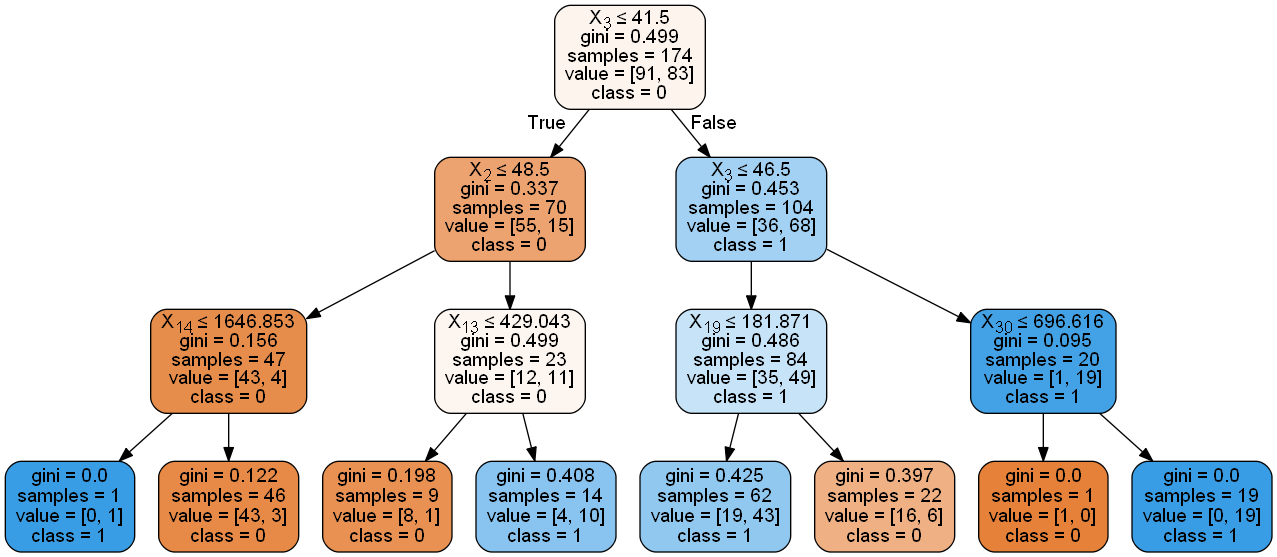

In [17]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(tree_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('OSA.png')
Image(graph.create_png())

## Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(max_depth=10,min_samples_split=20).fit(X, Y)
RF_model.fit(X, Y)



D:\ANACONDA\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Feature ranking:
1. feature E_Ancho3 (0.121249)
2. feature Weight (0.109565)
3. feature BMI (0.101348)
4. feature A_Ancho2 (0.066089)
5. feature O_Form3 (0.047896)
6. feature U_Form3 (0.040586)
7. feature I_Form4 (0.034636)
8. feature Age (0.032892)
9. feature O_Form2 (0.032442)
10. feature A_Form1 (0.028508)
11. feature E_Ancho4 (0.026136)
12. feature Cervical (0.024516)
13. feature O_Ancho1 (0.023414)
14. feature U_Ancho4 (0.021467)
15. feature A_Ancho1 (0.019202)
16. feature E_Form4 (0.018111)
17. feature A_Ancho3 (0.018025)
18. feature O_Form4 (0.017433)
19. feature E_Form3 (0.016218)
20. feature I_Form1 (0.014206)
21. feature O_Ancho3 (0.014126)
22. feature E_Form2 (0.013294)
23. feature U_Ancho2 (0.012710)
24. feature E_Ancho2 (0.012327)
25. feature U_Form1 (0.011265)
26. feature I_Ancho2 (0.010244)
27. feature A_Form4 (0.009921)
28. feature I_Form2 (0.009809)
29. feature U_Form2 (0.009659)
30. feature U_Ancho3 (0.009184)
31. feature O_Ancho2 (0.008858)
32. feature U_Ancho1 (0.00

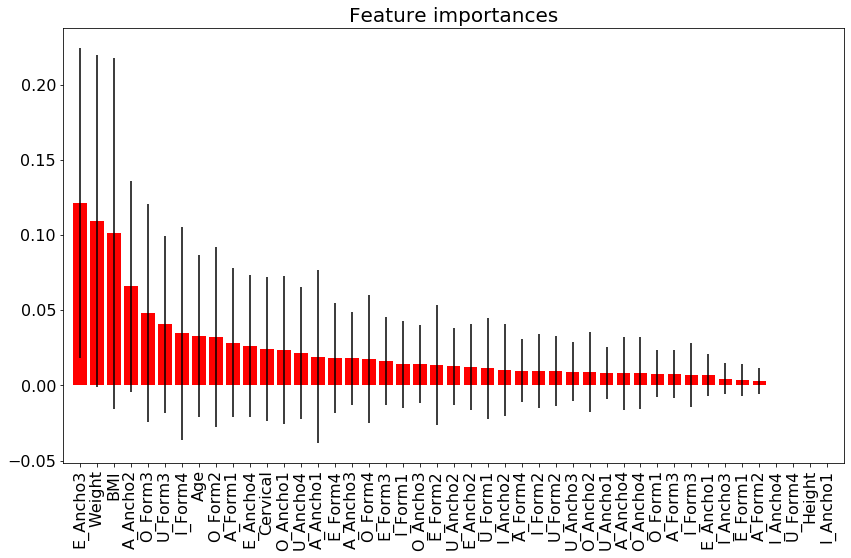

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

labels = df_OSA_inner.iloc[:,np.r_[3:7,8:49]].columns
importances = RF_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, labels[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(14,8))
plt.title("Feature importances", fontsize=20)
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), [labels[k] for k in indices],rotation='vertical')
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)

plt.xlim([-1, X.shape[1]])
plt.show()